In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# https://www.kaggle.com/jsphyg/weather-dataset-rattle-package 

# import data 
data = pd.read_csv('weatherAUS.csv')

# drop 'risk' column according to dataset creator
data.drop(columns=['RISK_MM'], inplace=True)

display(data)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


### How our data is constructed ?

In [3]:
# what columns ?
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
# drop some data, juged to be not too important
"""
data = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Evaporation',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]
"""

"\ndata = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Evaporation',\n       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',\n       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',\n       'Pressure9am', 'Pressure3pm', 'Temp9am',\n       'Temp3pm', 'RainToday']]\n"

In [5]:
data.Location.value_counts() # there is some variation in the number of data available for each city, but no one is underrepresented

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [6]:
# example for one date with multiple data line : => only one date if we filter on one location
z = data.Date.value_counts().index[0]
print(data['Location'].loc[data.Date == z].value_counts())


print(data['Location'].loc[data.Date == z].value_counts())


Sydney              1
Watsonia            1
PearceRAAF          1
MountGinini         1
SydneyAirport       1
Launceston          1
Albury              1
Nuriootpa           1
Bendigo             1
Dartmoor            1
Katherine           1
Uluru               1
Melbourne           1
Cairns              1
Williamtown         1
Albany              1
Nhil                1
Sale                1
MelbourneAirport    1
WaggaWagga          1
PerthAirport        1
BadgerysCreek       1
Cobar               1
AliceSprings        1
Darwin              1
NorahHead           1
Tuggeranong         1
Perth               1
Witchcliffe         1
Canberra            1
NorfolkIsland       1
Hobart              1
Wollongong          1
SalmonGums          1
Moree               1
Ballarat            1
Townsville          1
Woomera             1
MountGambier        1
Mildura             1
GoldCoast           1
CoffsHarbour        1
Brisbane            1
Adelaide            1
Walpole             1
Richmond  

# Feature engineering

### 1. 'Date' column

In [69]:
# extract the month of the year from the 'Date' column

def extract_month(row):
    return row.split('-')[1]

data['Month'] = data.Date.apply(extract_month)


# we drop 'Date' column
data.drop(columns=['Date'], inplace=True)

Text(0.5, 1.0, 'Number of rainy day by month')

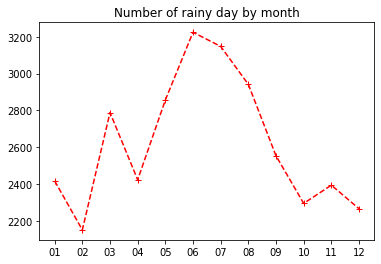

In [70]:
#influence of the month on the number of days raining ?

x = pd.crosstab(data.Month, data.RainToday)
plt.plot(x.iloc[:,1], 'r+--')
plt.title("Number of rainy day by month")

Text(0.5, 1.0, 'Number of meteo data by month')

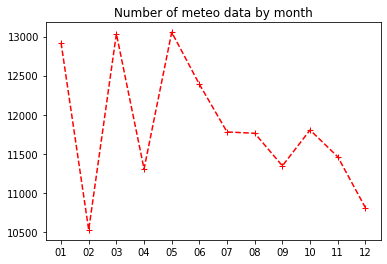

In [71]:
# Number of values by month :

x =data['Month'].value_counts().sort_index()

plt.plot(x, 'r+--')
plt.title('Number of meteo data by month')

We get a varying number of data depending on the month, but we can still see the impact of the month on the rain

### 2. Difference of temperature in the day (DeltaTemperature)

In [72]:
# Compute delta squared temperature features (between min and max of the day)

x = data['MinTemp']
y = data['MaxTemp']
z = target['RainTomorrow']

data['DeltaTemperature'] = (y - x)

<AxesSubplot:xlabel='RainToday', ylabel='DeltaTemperature'>

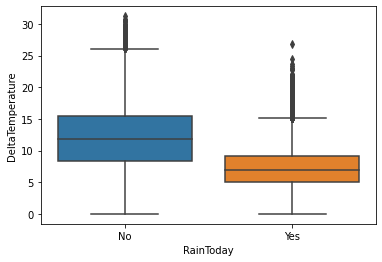

In [73]:
# box plot, with distinction with the value of 'RainTomorrow'

sns.boxplot(x="RainToday", y="DeltaTemperature", data=data)


<AxesSubplot:xlabel='RainTomorrow', ylabel='DeltaTemperature'>

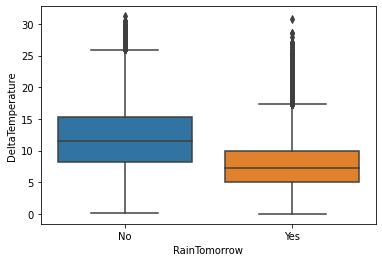

In [16]:
sns.boxplot(x="RainTomorrow", y="DeltaTemperature", data=data)

# The difference of temperature seems to have an influence on the rain  (today and tomorrow)

We see that the temperature difference in a day tends to happens in days when it's not raining the current nor the next day

### 3. Number of days without rain (DayWithoutRain)

In [83]:
# Compute the number of day without rain (by location)

def compute_daywithoutrain(red_data):
    """
    compute the number of days without rain
    supposing we one city in the data
    """
    # cant compute for the first rain day
    x =  red_data['RainToday']

    rain_idx = np.where(x == 'Yes')[0]

    start_idx = rain_idx.min()+1

    liste = []

    for index, elem in red_data.iterrows():

        if index >= start_idx  :

            day_count = index - rain_idx[np.where(rain_idx < index)[0].max()] -1

            liste.append(day_count)

        else: 
            liste.append(np.nan)
    
    return liste

In [84]:
data['DayWithoutRain'] = np.nan

grouped_data = data.groupby('Location')

# default value, will indicate empty value for this feature

for elem in list(grouped_data.groups) :
    red_data = grouped_data.get_group(elem)
    
    data['DayWithoutRain'].loc[red_data.index] =  compute_daywithoutrain(red_data.reset_index(drop=True))

/home/klegoff/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:ylabel='Frequency'>

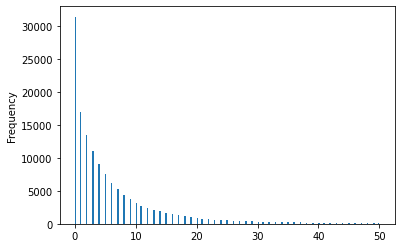

In [85]:
# Histogram plot of the frequency of each number of days without rain (only <= 50)
data.DayWithoutRain.loc[(data.DayWithoutRain <= 50)].plot.hist(bins = len(data.DayWithoutRain.value_counts()))

<AxesSubplot:xlabel='RainTomorrow', ylabel='DayWithoutRain'>

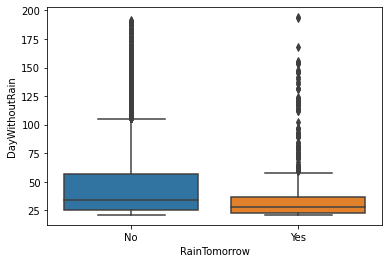

In [94]:
# box plot of the number of days withoutrain, with distinction with the value of 'RainTomorrow'
#focus number of days without rain > 20

sns.boxplot(x="RainTomorrow", y="DayWithoutRain", data=data.loc[data.DayWithoutRain>20])


<AxesSubplot:xlabel='RainTomorrow', ylabel='DayWithoutRain'>

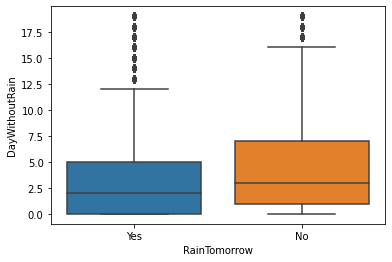

In [95]:
# box plot of the number of days withoutrain, with distinction with the value of 'RainTomorrow'

sns.boxplot(x="RainTomorrow", y="DayWithoutRain", data=data.loc[data.DayWithoutRain<20])

We can conclude, that for days where we have a low number of days without rain we have more chances to have a rainy day. In other terms, rainy days come in groups.

### 4. Exploration of the wind data

In [111]:
# wind direction feature 'WindGustDir', 'WindDir9am', 'WindDir3pm'

# direction => probably not very useful (same goes for 3pm and 9 am)
x = data['WindGustDir']
print(x)
print(x.value_counts())


# we drop these columns
data.drop(columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm'], inplace=True)

0           W
1         WNW
2         WSW
3          NE
4           W
         ... 
142188      E
142189      E
142190    NNW
142191      N
142192     SE
Name: WindGustDir, Length: 142193, dtype: object
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64


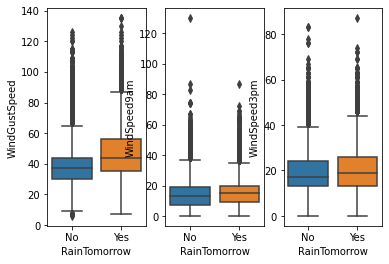

In [118]:
# wind speed :  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'


fig, axes = plt.subplots(1,3)

# speed
sns.boxplot(x="RainTomorrow", y="WindGustSpeed", data=data, ax=axes[0])


# 9 am speed
sns.boxplot(x="RainTomorrow", y="WindSpeed9am", data=data, ax=axes[1])

# 3 pm speed 
sns.boxplot(x="RainTomorrow", y="WindSpeed3pm", data=data, ax=axes[2])

# keep only Gust speed, since the most discriminative (max gust)
data.drop(columns = ['WindSpeed9am', 'WindSpeed3pm'], inplace=True)

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindGustSpeed'>

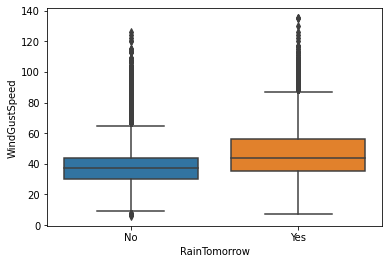

In [119]:
# Is there a relation between the wind and the rain ?

sns.boxplot(x="RainTomorrow", y="WindGustSpeed", data=data)

# rainy days tends to have a higher wind speed maximum

### 5. Exploration of the humidity data

<AxesSubplot:xlabel='RainTomorrow', ylabel='HumidityDelta'>

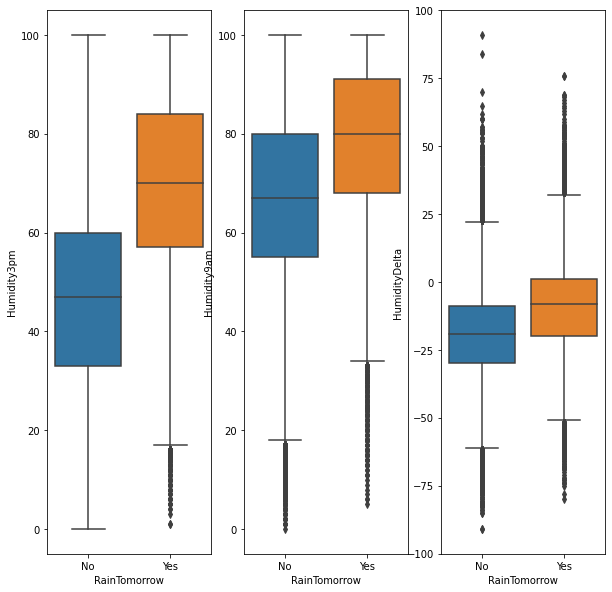

In [137]:
# humidity feature 'Humidity9am', 'Humidity3pm'

data['HumidityDelta'] = (data['Humidity3pm'] - data['Humidity9am'])

# humidity delta seems more relevant
fig, axes = plt.subplots(1,3, figsize=(10,10))

# 3 pm humidity 
sns.boxplot(x="RainTomorrow", y="Humidity3pm", data=data, ax=axes[0])

# 9 am humidity
sns.boxplot(x="RainTomorrow", y="Humidity9am", data=data, ax=axes[1])

sns.boxplot(x="RainTomorrow", y="HumidityDelta", data=data, ax=axes[2])


It seems that the current's day humidity has an impact on the next day's rain (3pm humidity is more discriminant than 9am one, which seems normal)
Let's keep the HumidityDelta as a feature, since it combines both in one.

### 6. Exploration of the pressure data

<AxesSubplot:xlabel='RainTomorrow', ylabel='PressureDelta'>

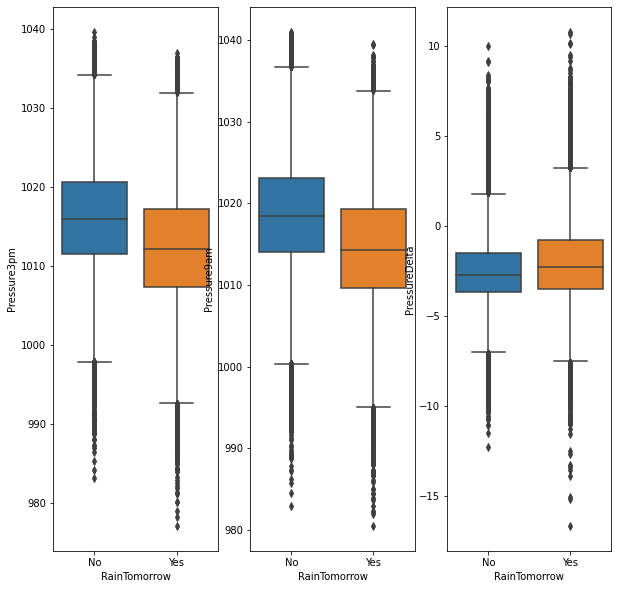

In [139]:
# pressure feature  'Pressure9am', 'Pressure3pm'

data['PressureDelta'] = data['Pressure3pm'] - data['Pressure9am']

fig, axes = plt.subplots(1,3, figsize=(10,10))

# 3 pm humidity 
sns.boxplot(x="RainTomorrow", y="Pressure3pm", data=data, ax=axes[0])

# 9 am humidity
sns.boxplot(x="RainTomorrow", y="Pressure9am", data=data, ax=axes[1])

sns.boxplot(x="RainTomorrow", y="PressureDelta", data=data, ax=axes[2])


The day before a rainy day tends to have lower pressure. We can see that the pressure delta can discriminate days with a big pressure drop (lower decile has a wider range than for days that aren't followed by rainy day)

In [141]:
### 7. Exploration of the temperature data

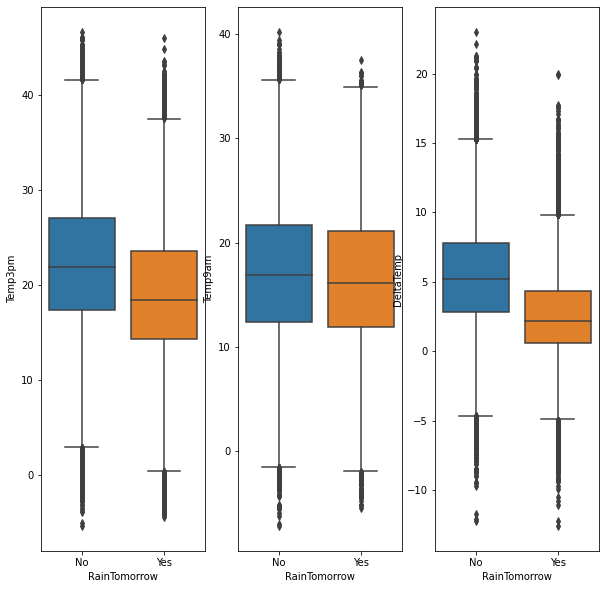

In [143]:
# temperature feature  'Temp9am', 'Temp3pm'

data['DeltaTemp'] = data['Temp3pm'] - data['Temp9am']

fig, axes = plt.subplots(1,3, figsize=(10,10))

# 3 pm temperature 
sns.boxplot(x="RainTomorrow", y="Temp3pm", data=data, ax=axes[0])

# 9 am temperature
sns.boxplot(x="RainTomorrow", y="Temp9am", data=data, ax=axes[1])

sns.boxplot(x="RainTomorrow", y="DeltaTemp", data=data, ax=axes[2])

# temperatures arent discriminative, but temperature delta is
data.drop(columns=['Temp3pm','Temp9am'], inplace = True)

### 9. Impact of the location

In [180]:
# idea : encode the region, by integers with a notion of order (from the lowest frequent rain city to the highest)

def rain_proportion(city):
    """
    return the proportion of days that have "RainTomorrow" = "Yes"
    """
    red_data = grouped_data.get_group(city)
    return len(np.where(red_data.RainToday == "Yes")[0])/len(red_data)

#count proportion of days with rain in each city

grouped_data = data.groupby('Location')

city_list = list(grouped_data.groups.keys())
proportion_list = []

for city in city_list:
    
    proportion_list.append(rain_proportion(city))

RainProportion = pd.Series(proportion_list, index=city_list,name="Proportion of rain days")

display(RainProportion)

Adelaide            0.218770
Albany              0.296088
Albury              0.204251
AliceSprings        0.079512
BadgerysCreek       0.195355
Ballarat            0.256935
Bendigo             0.185234
Brisbane            0.222714
Cairns              0.314926
Canberra            0.182563
Cobar               0.128514
CoffsHarbour        0.292922
Dartmoor            0.312946
Darwin              0.266917
GoldCoast           0.254027
Hobart              0.239021
Katherine           0.164849
Launceston          0.230185
Melbourne           0.238193
MelbourneAirport    0.217016
Mildura             0.108414
Moree               0.133847
MountGambier        0.303300
MountGinini         0.268662
Newcastle           0.243993
Nhil                0.152964
NorahHead           0.271424
NorfolkIsland       0.307692
Nuriootpa           0.195869
PearceRAAF          0.171615
Penrith             0.196019
Perth               0.202004
PerthAirport        0.188435
Portland            0.363151
Richmond      

Text(0.5, 1.0, 'Proportion of rain days, ordered from the least rainy city to the most rainy')

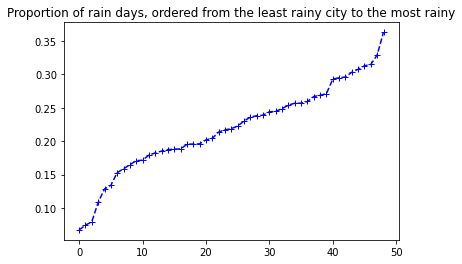

In [194]:
#We sort the city by growing proportion of rain days
RainProportion = RainProportion.sort_values()
plt.plot(RainProportion.values,'b+--')
plt.title('Proportion of rain days, ordered from the least rainy city to the most rainy')


In [207]:
# We replace the names of the cities by their rank on the list of the leat rainy cities

ordered_city = list(RainProportion.index)
replace_dict = {}

for i in range(len(ordered_city)):
    replace_dict[ordered_city[i]] = i
#target.replace({'Yes':1,'No':0}, inplace =True)

data = data.replace(replace_dict)

In [211]:
print(replace_dict)

{'Woomera': 0, 'Uluru': 1, 'AliceSprings': 2, 'Mildura': 3, 'Cobar': 4, 'Moree': 5, 'Nhil': 6, 'SalmonGums': 7, 'Katherine': 8, 'Townsville': 9, 'PearceRAAF': 10, 'WaggaWagga': 11, 'Canberra': 12, 'Bendigo': 13, 'Tuggeranong': 14, 'Richmond': 15, 'PerthAirport': 16, 'BadgerysCreek': 17, 'Nuriootpa': 18, 'Penrith': 19, 'Perth': 20, 'Albury': 21, 'Sale': 22, 'MelbourneAirport': 23, 'Adelaide': 24, 'Brisbane': 25, 'Launceston': 26, 'Wollongong': 27, 'Melbourne': 28, 'Hobart': 29, 'Newcastle': 30, 'Watsonia': 31, 'Williamtown': 32, 'GoldCoast': 33, 'SydneyAirport': 34, 'Ballarat': 35, 'Sydney': 36, 'Darwin': 37, 'MountGinini': 38, 'NorahHead': 39, 'CoffsHarbour': 40, 'Witchcliffe': 41, 'Albany': 42, 'MountGambier': 43, 'NorfolkIsland': 44, 'Dartmoor': 45, 'Cairns': 46, 'Walpole': 47, 'Portland': 48}


### 10. Type replacement, and filtering out the unused features

In [148]:
target = data[['RainTomorrow']]
data.drop(columns='RainTomorrow', inplace=True)

In [213]:
columns_to_keep = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm','RainToday', 'HumidityDelta', 'PressureDelta', 'DeltaTemp']

data = data[columns_to_keep]

In [214]:
data

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,HumidityDelta,PressureDelta,DeltaTemp
0,21,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,No,-49.0,-0.6,4.9
1,21,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,No,-19.0,-2.8,7.1
2,21,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,No,-8.0,1.1,2.2
3,21,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,No,-29.0,-4.8,8.4
4,21,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,No,-49.0,-4.8,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,1,3.5,21.8,0.0,31.0,59.0,27.0,1024.7,1021.2,No,-32.0,-3.5,11.5
142189,1,2.8,23.4,0.0,31.0,51.0,24.0,1024.6,1020.3,No,-27.0,-4.3,12.3
142190,1,3.6,25.3,0.0,22.0,56.0,21.0,1023.5,1019.1,No,-35.0,-4.4,13.6
142191,1,5.4,26.9,0.0,37.0,53.0,24.0,1021.0,1016.8,No,-29.0,-4.2,13.6


In [215]:
# transform non numerical features into numerical & deal with 'nan' values

target.replace({'Yes':1,'No':0}, inplace =True)

data.replace({'Yes':1,'No':0}, inplace =True)

# evaporation, windgustspeed : nan => 0
#data.replace({'WindGustSpeed':np.nan , 'Evaporation' : np.nan}, 0, inplace=True)

/home/klegoff/.local/lib/python3.8/site-packages/pandas/core/frame.py:4373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [219]:
# Save the preprocessed data

data.to_csv('preprocessed_data.csv')
target.to_csv('target.csv')